Over/Under - Evaluating our Edge

    - In this notebook, we repeat the evaluation of the over/under model but with a larger test set

    - We will then do some simulations to see what kinds of profit we could expect (assuming our edge is real)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import structureboost as stb
import ml_insights as mli
import scipy as sp

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [2]:
df = pd.read_csv('df_bp9.csv', low_memory=False)

df_runs = pd.read_csv('df_runs_bp11.csv', low_memory=False)

In [3]:
df_runs['runs_trunc'] = np.minimum(df_runs['runs'],16)

In [4]:
# Let's modify this part to make the test set bigger

df_train = df_runs[(df_runs.season>1901) & (df_runs.season<=2000) & ~(df_runs.OBP_162.isnull())]
df_valid = df_runs[(df_runs.season>=2001) & (df_runs.season<=2018)]
df_test = df_runs[df_runs.season>=2019]

df_test_game = df[df.season>=2019]

BEGIN MODELING

In [5]:
df_runs.head()

,season,date,dblheader_code,date_dblhead,team_h,team_v,league_h,league_v,over_under_line,over_under_result,ballpark_id,day_night,runs,BATAVG_30,OBP_30,SLG_30,OBS_30,ERR_30,SB_30,CS_30,BATAVG_162,OBP_162,SLG_162,OBS_162,ERR_162,SB_162,CS_162,lineup8_BATAVG_30,lineup9_BATAVG_30,lineup8_BATAVG_30_w,lineup9_BATAVG_30_w,lineup8_OBP_30,lineup9_OBP_30,lineup8_OBP_30_w,lineup9_OBP_30_w,lineup8_SLG_30,lineup9_SLG_30,lineup8_SLG_30_w,lineup9_SLG_30_w,lineup8_OBS_30,lineup9_OBS_30,lineup8_OBS_30_w,lineup9_OBS_30_w,lineup8_SLGmod_30,lineup9_SLGmod_30,lineup8_SLGmod_30_w,lineup9_SLGmod_30_w,lineup8_SObat_perc_30,lineup9_SObat_perc_30,lineup8_SObat_perc_30_w,lineup9_SObat_perc_30_w,lineup8_BATAVG_75,lineup9_BATAVG_75,lineup8_BATAVG_75_w,lineup9_BATAVG_75_w,lineup8_OBP_75,lineup9_OBP_75,lineup8_OBP_75_w,lineup9_OBP_75_w,lineup8_SLG_75,lineup9_SLG_75,lineup8_SLG_75_w,lineup9_SLG_75_w,lineup8_OBS_75,lineup9_OBS_75,lineup8_OBS_75_w,lineup9_OBS_75_w,lineup8_SLGmod_75,lineup9_SLGmod_75,lineup8_SLGmod_75_w,lineup9_SLGmod_75_w,lineup8_SObat_perc_75,lineup9_SObat_perc_75,lineup8_SObat_perc_75_w,lineup9_SObat_perc_75_w,lineup8_BATAVG_162,lineup9_BATAVG_162,lineup8_BATAVG_162_w,lineup9_BATAVG_162_w,lineup8_OBP_162,lineup9_OBP_162,lineup8_OBP_162_w,lineup9_OBP_162_w,lineup8_SLG_162,lineup9_SLG_162,lineup8_SLG_162_w,lineup9_SLG_162_w,lineup8_OBS_162,lineup9_OBS_162,lineup8_OBS_162_w,lineup9_OBS_162_w,lineup8_SLGmod_162,lineup9_SLGmod_162,lineup8_SLGmod_162_w,lineup9_SLGmod_162_w,lineup8_SObat_perc_162,lineup9_SObat_perc_162,lineup8_SObat_perc_162_w,lineup9_SObat_perc_162_w,lineup8_BATAVG_350,lineup9_BATAVG_350,lineup8_BATAVG_350_w,lineup9_BATAVG_350_w,lineup8_OBP_350,lineup9_OBP_350,lineup8_OBP_350_w,lineup9_OBP_350_w,lineup8_SLG_350,lineup9_SLG_350,lineup8_SLG_350_w,lineup9_SLG_350_w,lineup8_OBS_350,lineup9_OBS_350,lineup8_OBS_350_w,lineup9_OBS_350_w,lineup8_SLGmod_350,lineup9_SLGmod_350,lineup8_SLGmod_350_w,lineup9_SLGmod_350_w,lineup8_SObat_perc_350,lineup9_SObat_perc_350,lineup8_SObat_perc_350_w,lineup9_SObat_perc_350_w,Strt_ERA_10,Strt_WHIP_10,Strt_SO_perc_10,Strt_H_BB_perc_10,Strt_TB_BB_perc_10,Strt_FIP_10,Strt_FIP_perc_10,Strt_ERA_35,Strt_WHIP_35,Strt_SO_perc_35,Strt_H_BB_perc_35,Strt_TB_BB_perc_35,Strt_FIP_35,Strt_FIP_perc_35,Strt_ERA_75,Strt_WHIP_75,Strt_SO_perc_75,Strt_H_BB_perc_75,Strt_TB_BB_perc_75,Strt_FIP_75,Strt_FIP_perc_75,Bpen_WHIP_10,Bpen_SO_perc_10,Bpen_H_BB_perc_10,Bpen_TB_BB_perc_10,Bpen_WHIP_35,Bpen_SO_perc_35,Bpen_H_BB_perc_35,Bpen_TB_BB_perc_35,Bpen_WHIP_75,Bpen_SO_perc_75,Bpen_H_BB_perc_75,Bpen_TB_BB_perc_75,home_hitting,runs_trunc
0,1901,19010531,0,190105310,MLA,WS1,AL,AL,0.0,NaN,MIL04,D,3,0.291209,0.348485,0.380952,0.729437,103.0,56.0,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.714286,1.142857,0.007519,0.270677,0.312030,3.571429,0.845865,3.628571,1.285714,0.078095,0.307095,0.362619,3.947657,0.986914,4.360000,1.400000,0.143111,0.340644,0.409222,4.248640,1.062160,1.5,0.20,0.370000,0.4500,1.500000,0.200000,0.370000,0.450000,1.500000,0.200000,0.370000,0.450000,1,3
1,1901,19010625,0,190106250,WS1,MLA,AL,AL,0.0,NaN,WAS07,D,3,0.285987,0.337754,0.384175,0.721930,76.0,46.0,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000,1.402778,0.015444,0.389961,NaN,6.444444,1.791506,2.780952,1.395238,0.070000,

In [6]:
feat_set = ['OBP_162',
 'SLG_162',
 'Strt_WHIP_35',
 'Strt_TB_BB_perc_35',
 'Strt_H_BB_perc_35',
 'Strt_SO_perc_10',
 'Bpen_WHIP_75',
 'Bpen_TB_BB_perc_75',
 'Bpen_H_BB_perc_75',
 'Bpen_SO_perc_75',
 'Bpen_WHIP_35',
 'Bpen_TB_BB_perc_35',
 'Bpen_H_BB_perc_35',
 'Bpen_SO_perc_35',
 'Bpen_WHIP_10',
 'Bpen_TB_BB_perc_10',
 'Bpen_H_BB_perc_10',
 'Bpen_SO_perc_10',
 'lineup9_OBP_162',
 'lineup9_SLG_162',
 'home_hitting']

In [7]:
bpv2 = np.linspace(-.5,16.5,18)
bpv2

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

In [8]:
df_runs['runs_trunc'] = np.minimum(df_runs['runs'],16)

In [9]:
# def try_features_runs(feat_set, max_depth=2):
target = 'runs_trunc'
X_train = df_train.loc[:,feat_set]
X_valid = df_valid.loc[:,feat_set]
X_test = df_test.loc[:,feat_set]

y_train = df_train[target].to_numpy()
y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

In [10]:
cr1 = stb.Coarsage(num_trees = 1000, learning_rate=.02, max_depth=4,
                  binpt_method = 'fixed', 
               binpt_vec=bpv2)
cr1.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stop_past_steps=5, eval_freq=10)

i=0, eval_set_loss = 2.4532001923904496
i=10, eval_set_loss = 2.449242389477822
i=20, eval_set_loss = 2.446206099314619
i=30, eval_set_loss = 2.4440082327483763
i=40, eval_set_loss = 2.4422707719096803
i=50, eval_set_loss = 2.4409847837703396
i=60, eval_set_loss = 2.439936395616413
i=70, eval_set_loss = 2.4391464114686845
i=80, eval_set_loss = 2.438436403265059
i=90, eval_set_loss = 2.437792934747999
i=100, eval_set_loss = 2.437231195745138
i=110, eval_set_loss = 2.436753526099842
i=120, eval_set_loss = 2.436356744226821
i=130, eval_set_loss = 2.436086679229214
i=140, eval_set_loss = 2.4358576218976866
i=150, eval_set_loss = 2.4356688300189195
i=160, eval_set_loss = 2.435519556975186
i=170, eval_set_loss = 2.4353894165676464
i=180, eval_set_loss = 2.4352953913484363
i=190, eval_set_loss = 2.435225370156762
i=200, eval_set_loss = 2.4351392738842357
i=210, eval_set_loss = 2.4350784961139698
i=220, eval_set_loss = 2.4350631892481984
i=230, eval_set_loss = 2.435041073330172
i=240, eval_set

In [11]:
preds_test = cr1.predict_distributions(X_test)

In [12]:
preds_test.log_loss(y_test)

2.451642838478843

Predicting the Over / Under

    - As a first step, we will model the total score as an independent sum of the two scores

    - For baseball, this is not a terrible assumption (would be worse in other sports)

    - Still, would expect some imperfection, since teams make strategic decisions based on the score of the game

        - Play for one run in a close game
        
        - Put a rookie pitcher in with a big lead

In [13]:
def probs_oup_val(probvec_a, probvec_b, val, ties_go_over=True):
    """given two probability distributions and the ou-line, returns prob of under"""
    val_up = int(np.ceil(val))
    val_down = int(np.floor(val))
    cdf_b = np.cumsum(probvec_b)
    prob_under = 0
    prob_push = 0
    if (val_down<val_up): # This means we have a decimal (.5) o/u value - no pushes      
        for i in range(0, val_down+1):
            # calculate prob that we are less than or equal to val_down for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-i]
        return(1-prob_under-prob_push, prob_under, prob_push)
    else: # This means val_down == val_up == val and we have an integer line so pushes are possible
        for i in range(0, val_down):
            # calculate prob that we are less than or equal to val_down-1 for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-1-i]
        for j in range(0, val_down+1):
            # calculate prob that we are exactly = val_down
            if (not ties_go_over) or (j != val_down-j): # if line is 10 and predicts score of 5-5, maybe count as over
                prob_push += probvec_a[j] * probvec_b[val_down-j] 
        return(1-prob_under-prob_push, prob_under,  prob_push)

In [14]:
num_games_test=int(df_test.shape[0]/2)

In [15]:
oup_probs = np.array([probs_oup_val(preds_test[i].probvec, preds_test[i+num_games_test].probvec, df_test.over_under_line.iloc[i])
                        for i in range(num_games_test)])

In [16]:
oup_probs[:5,:]

array([[0.37767655, 0.53528674, 0.08703671],
       [0.41967802, 0.58032198, 0.        ],
       [0.41671957, 0.58328043, 0.        ],
       [0.54783705, 0.35261882, 0.09954413],
       [0.52126668, 0.47873332, 0.        ]])

In [17]:
oup_probs.mean(axis=0)

array([0.42584005, 0.53385118, 0.04030877])

In [18]:
df_test.over_under_result.value_counts().sum(), df_test.over_under_result.value_counts()/df_test.over_under_result.value_counts().sum()

(16358,
 U    0.482333
 O    0.468639
 P    0.049028
 Name: over_under_result, dtype: float64)

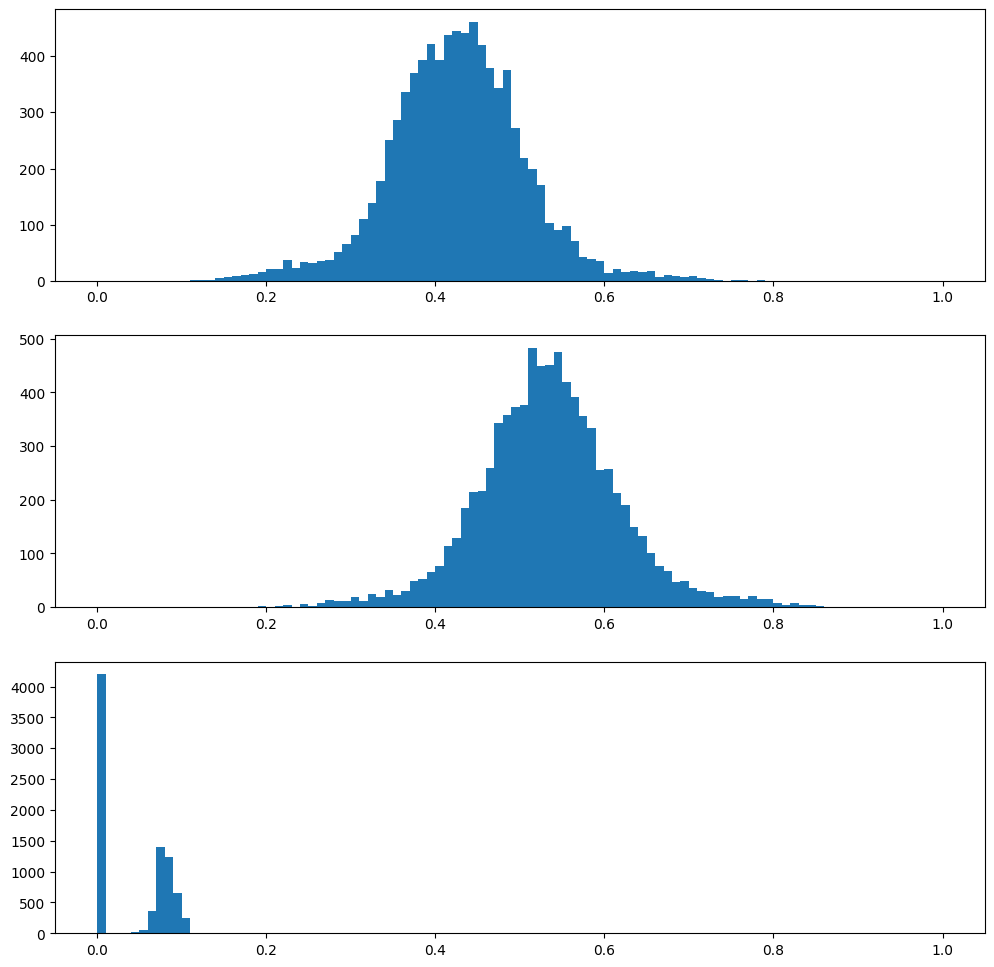

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.hist(oup_probs[:,0], np.linspace(0,1,101));
plt.subplot(3,1,2)
plt.hist(oup_probs[:,1], np.linspace(0,1,101));
plt.subplot(3,1,3)
plt.hist(oup_probs[:,2], np.linspace(0,1,101));

In [20]:
def evaluate_edge_probs(oupmat, edge, test_df_w_ouline):
    bet_under = (oupmat[:,1]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    bet_over = (oupmat[:,0]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    num_cases_under = np.sum(bet_under)
    num_cases_over = np.sum(bet_over)
    num_cases_total = num_cases_under + num_cases_over
    num_under_correct = (test_df_w_ouline.loc[bet_under,'over_under_result']=='U').sum()
    num_under_push = (test_df_w_ouline.loc[bet_under,'over_under_result']=='P').sum()
    num_over_correct = (test_df_w_ouline.loc[bet_over,'over_under_result']=='O').sum()
    num_over_push = (test_df_w_ouline.loc[bet_over,'over_under_result']=='P').sum()
    num_correct = num_under_correct + num_over_correct
    num_pushes = num_under_push + num_over_push
    num_incorrect = num_cases_total -num_correct - num_pushes
    pct_correct = num_correct / num_cases_total
    pct_pushes = num_pushes / num_cases_total
    pct_incorrect = num_incorrect / num_cases_total
    pct_under_correct = num_under_correct/num_cases_under
    pct_under_push = num_under_push/num_cases_under
    pct_over_correct = num_over_correct/num_cases_over
    pct_over_push = num_over_push/num_cases_over
    print(f'\nThere were {num_cases_total} games that met criteria of edge > {edge} ({num_cases_under} unders and {num_cases_over} overs)')
    print(f'Of them {num_correct} ({np.round(pct_correct,3)}) were correct (winning bets), ({num_under_correct} unders and {num_over_correct} overs) ')
    print(f'and {num_pushes} ({np.round(pct_pushes,3)}) were Pushes ({num_under_push} unders and {num_over_push} overs)')
    print(f'and {num_incorrect} ({np.round(pct_incorrect,3)}) were incorrect (losing bets))')
    winning_edge_m110 = pct_correct*1 + pct_incorrect*(-1.1)
    win_total_m110 = num_correct*1 + num_incorrect*(-1.1)
    print(f'Betting the Under at a line of -110, your profit would have been {np.round(winning_edge_m110,4)} per bet')
    print(f'\t for a total profit of {np.round(win_total_m110,2)} across all {num_cases_total} bets')
    print('\n')

In [21]:
for i in np.linspace(.25, .05,5):
    print(f'threshold = {i}')
    evaluate_edge_probs(oup_probs, i, df_test_game)

threshold = 0.25

There were 182 games that met criteria of edge > 0.25 (170 unders and 12 overs)
Of them 99 (0.544) were correct (winning bets), (92 unders and 7 overs) 
and 8 (0.044) were Pushes (6 unders and 2 overs)
and 75 (0.412) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0907 per bet
	 for a total profit of 16.5 across all 182 bets


threshold = 0.2

There were 389 games that met criteria of edge > 0.2 (342 unders and 47 overs)
Of them 209 (0.537) were correct (winning bets), (183 unders and 26 overs) 
and 17 (0.044) were Pushes (14 unders and 3 overs)
and 163 (0.419) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0763 per bet
	 for a total profit of 29.7 across all 389 bets


threshold = 0.15

There were 942 games that met criteria of edge > 0.15 (823 unders and 119 overs)
Of them 474 (0.503) were correct (winning bets), (415 unders and 59 overs) 
and 49 (0.052) were Pushes (4

In [22]:
def evaluate_lkratio(nc, ni, null_prob, alt_prob):
    null_lk = sp.stats.binom.pmf(nc,nc+ni,null_prob)
    alt_lk = sp.stats.binom.pmf(nc,nc+ni,alt_prob)
    return(alt_lk/null_lk)

In [23]:
evaluate_lkratio(86, 66, .5, 86/(86+66))

3.7419719357470718

In [24]:
evaluate_lkratio(197, 147, .5, 197/(197+147))

38.345025032134195

In [25]:
evaluate_lkratio(407, 354, .5, 407/(407+354))

6.3413570917377875

In [26]:
evaluate_lkratio(1020, 960, .5, 1020/(1020+960))

2.4824105711719886

In [27]:
def_prob = 0.482333/(0.482333+0.468639)
def_prob

0.5072000016824891

In [28]:
evaluate_lkratio(197, 147, def_prob, 197/(197+147))

19.34133447034709

In [29]:
mid_prob = (def_prob+(197/(197+147)))/2
mid_prob

0.5399372101435702

In [30]:
197/(197+147)

0.5726744186046512

In [31]:
evaluate_lkratio(197, 147, def_prob, mid_prob)

9.179790352860692

Let's simulate the future

    - Assume we can be "right" 57.2% of the time

    - How much can we expect to make betting for an entire season?

    - How likely is it that we would lose money?

In [32]:
df_test_game.season.value_counts()

2019    2429
2022    2427
2021    2425
2020     898
Name: season, dtype: int64

In [33]:
pct_games_to_bet = 362/16358
num_games_in_season = 2430
pct_games_to_bet, pct_games_to_bet*num_games_in_season

(0.022129844724293923, 53.77552268003423)

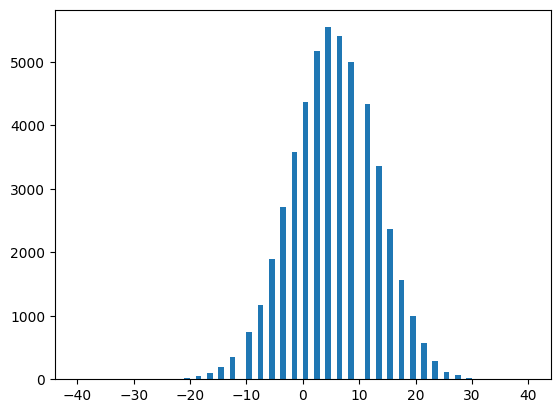

In [34]:
num_games_bet = 53
betting_wins = np.random.binomial(n=num_games_bet, p=.572, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-40,40,81));

In [35]:
np.mean(amount_won<0)

0.21708

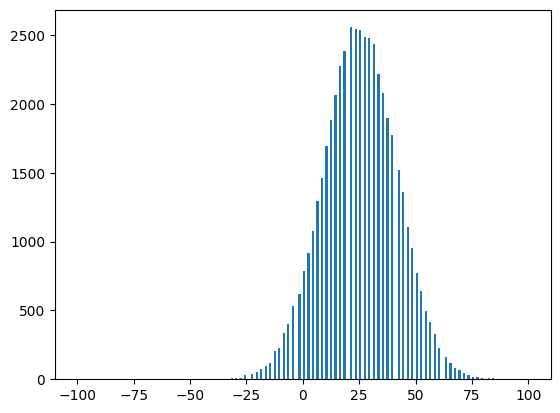

In [36]:
num_games_bet = 250
betting_wins = np.random.binomial(n=num_games_bet, p=.572, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-100,100,201));

In [37]:
np.mean(amount_won<0)

0.0554

Conclusions

    - Profit is small relative to the amounts bet

    - Even with edge, still reasonable chance of losing money!

    - Good news - this was our first stab at a model! Lots of ways to improve

    - Bad news - potential that this model could be off (rule changes, etc)

Possible Next Steps

    - Explore calibration / validity of team level run-prediction

    - Build model for Under/Over/Push rather than relying on independence assumption (make features out of the probability distributions)

    - Generally improve runs scored model (feature selection, hyper-parameter tuning, etc.)

    - Use the runs scored model to develop features for predicting the winner (against moneyline)

    - Predict run "differential" and use that to predict winner (against moneyline)

    - See if runs scored models can help us bet on the spread (like point spreads in football)